# Segmentation Study

## Basic Segmentation: 

### Inferences from EDA from Classifier Project: 

- Higher age more likely to belong to positive class. 
- Higher education more likely to belong to positive class. 
- Higher hours a week more likely to belong to positive class. 

### Step 1: Some more insights on features segments. 

This segment will mainly deal with logicing our way thru the dataset where you can possibly look for clusters and segments. 

In [1]:
import os
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data_folder_path = "datasets";

def fetch_data(datafilename, data_folder_path = data_folder_path):
        """
        Description: Function to read *.csv file in folder path 'data_folder_path' with name 'datafilename'. 
        
        Parameters:
        ------------

        datafilename = name of *.csv file.  
        data_folder_path = Dataset folder path. 

        Returns: 
        --------
        pd Dataframe 
        """
        
        data_url = os.path.join(data_folder_path, datafilename)
        return pd.read_csv(data_url)
    
train_set = fetch_data("au_train.csv")
test_set = fetch_data("au_test.csv")

consolidated_set = pd.concat([train_set, test_set])
#consolidated_set

#### Suspecting that married/ever married people will tend to be older. 

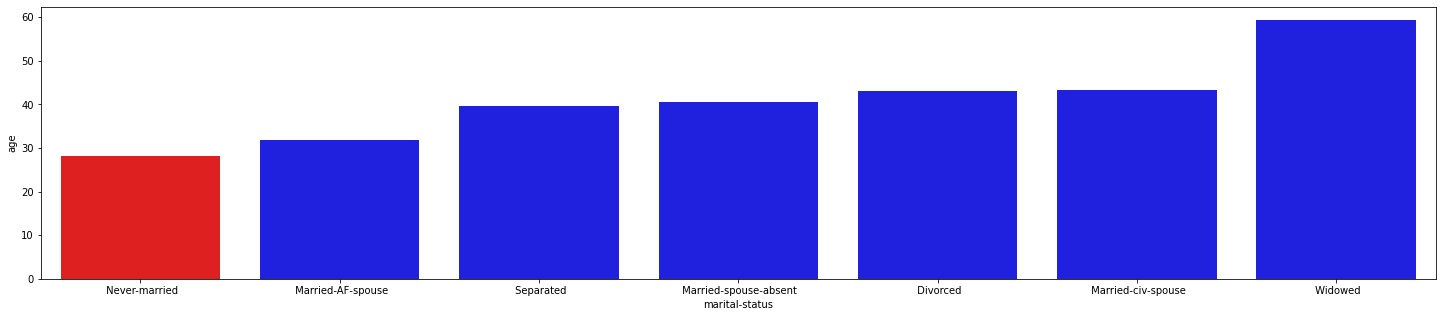

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

age_marital_raw = consolidated_set[["age", "marital-status"]]
age_marital = consolidated_set.groupby(["marital-status"])["age"].mean().reset_index().sort_values("age")
fig, ax =  plt.subplots(1, 1, figsize=(25, 5))

clr = ["red" if i == " Never-married" else "blue" for i in age_marital["marital-status"]]

sns.barplot(x= 'marital-status', y="age", palette = clr,data=age_marital, ax = ax)
#sns.violinplot(x="marital-status", y="age",data = age_marital_raw, ax = ax[1]);

In [33]:
import plotly.graph_objects as go
import numpy as np

#Single
single = age_marital_raw[age_marital_raw["marital-status"] == " Never-married"]

#Presently Married
married_bool = age_marital_raw["marital-status"].isin([" Married-civ-spouse",
                                                       " Married-AF-spouse", " Married-spouse-absent"])
married = age_marital_raw[married_bool]

#previously married: 
prevmarried_bool = age_marital_raw["marital-status"].isin([" Divorced",
                                                       " Widowed", " Separated"])
prevmarried = age_marital_raw[prevmarried_bool]

fig1 = go.Figure()
single_trace = go.Histogram(
    x=single["age"],
    name='Single', 
    marker_color='#EB89B5',
    opacity=0.75
)

presently_married_trace = go.Histogram(
    x=married["age"],
    name='Married',
    marker_color='#330C73',
    opacity=0.75
)

previously_married_trace = go.Histogram(
    x=prevmarried["age"],
    name='Previously Married',
    opacity=0.75
)

data = [single_trace, presently_married_trace, previously_married_trace]

layout = go.Layout(
    title_text='Age-Marital Status Histogram (Legends to toggle, Tool-Tip)', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.15, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig = go.Figure(data = data, layout = layout)
fig.show()
